In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.rcParams['axes.unicode_minus'] = False # '-' 폰트 이슈
plt.rcParams['font.family'] = 'Malgun Gothic' # 운영체제에 맞게 쓰기

import pandas as pd

In [3]:
df = pd.read_excel('data/sample-line-1.xlsx', index_col='날짜')
print(df.shape)
df.head()

(3189, 5)


,체결가,전일비,등락률,거래량(천주),거래대금(백만)
날짜,,,,,
2018-11-23,266.33,1.43,-0.53%,58346,2670694
2018-11-22,267.76,0.51,-0.19%,63147,2917863
2018-11-21,268.27,1.31,-0.49%,79375,3726326
2018-11-20,269.58,2.73,-1.00%,79088,3667388
2018-11-19,272.31,0.66,+0.24%,73094,3401282


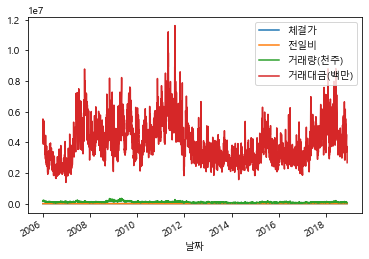

In [5]:
ax = df.plot()

In [8]:
figure = ax.figure
figure.savefig('일일주식현황.png', dpi=300)

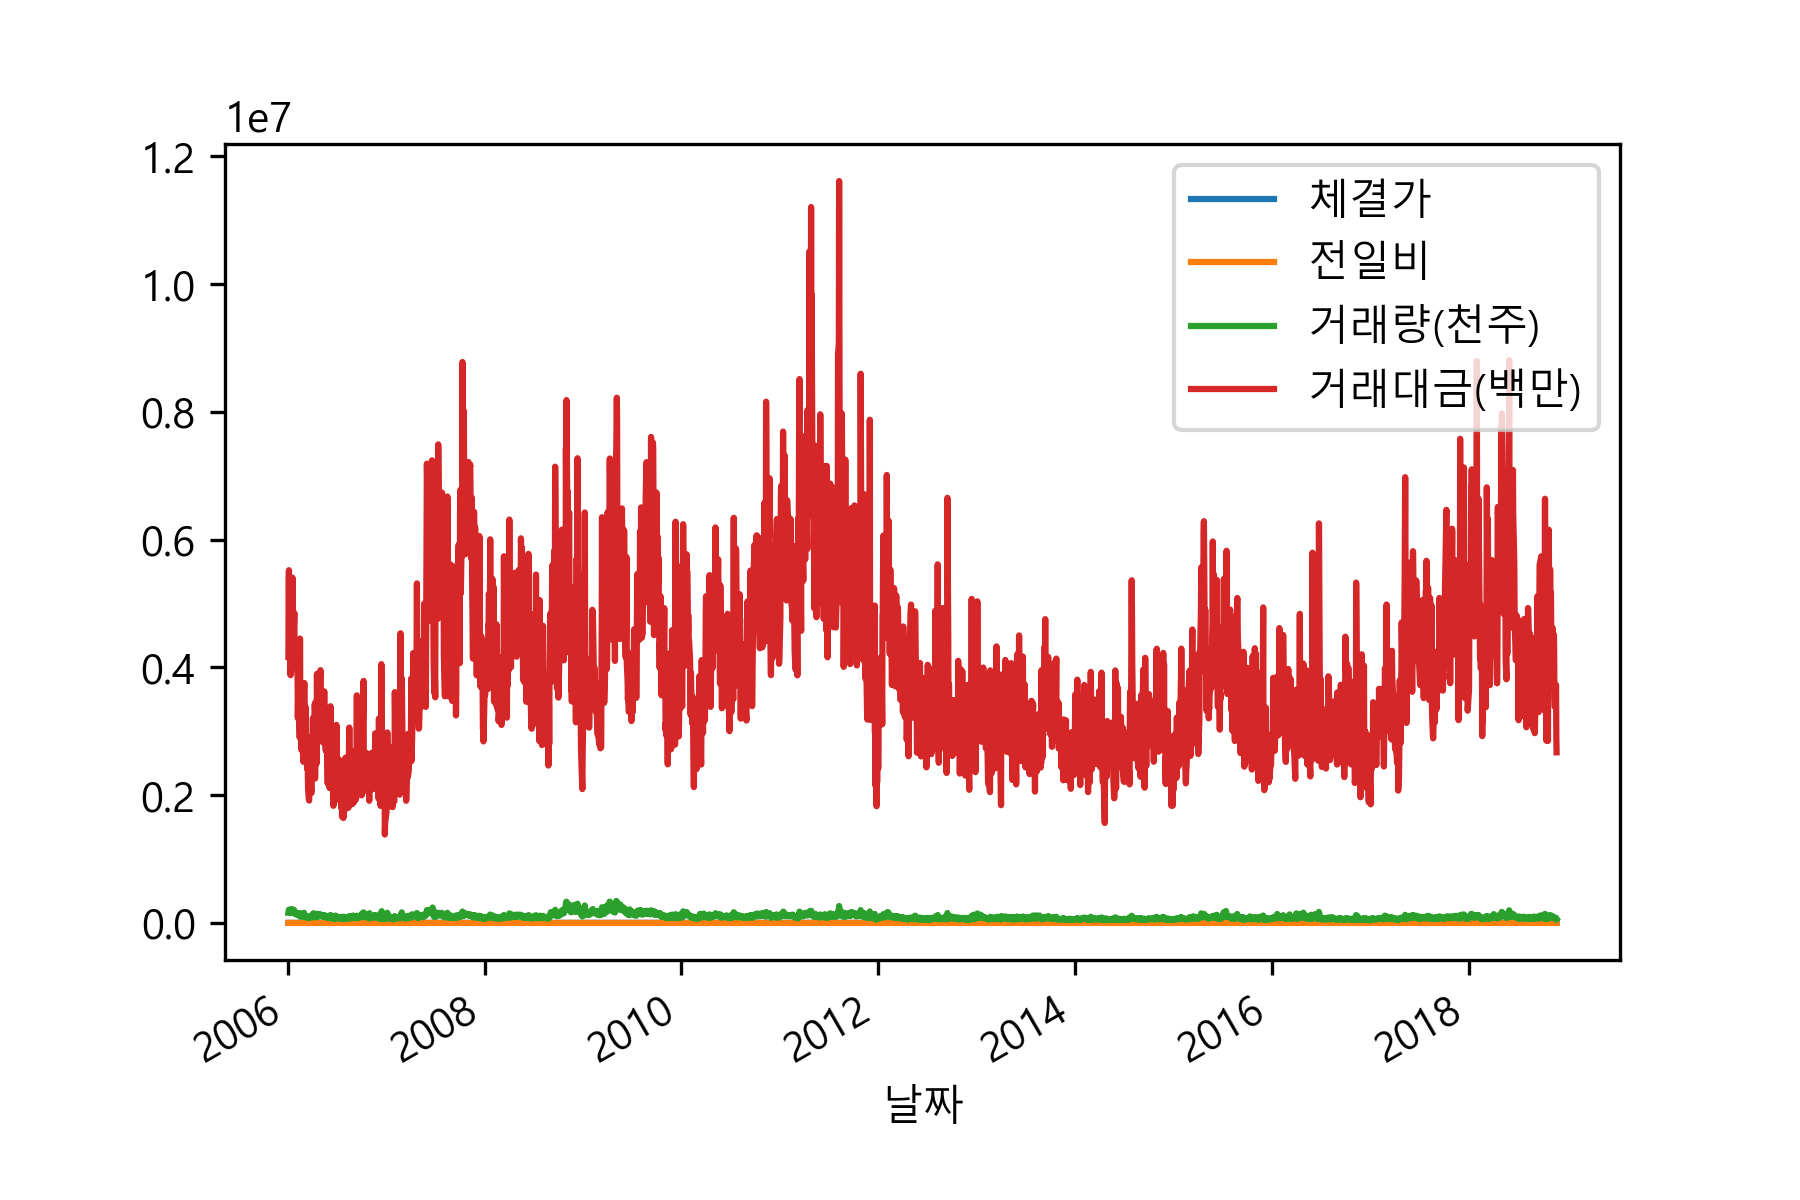

In [11]:
from IPython.display import Image
Image('일일주식현황.png')

In [18]:
import xlwings as xw
sheet = xw.sheets.active
sheet.pictures

Pictures([])

In [26]:
sheet.pictures.add(figure, name='일일주식현황', update=True)

<Picture '일일주식현황' in <Sheet [통합 문서1]Sheet1>>

## DataFrame/Figure 반영하기(1)

In [30]:
xw.view(df, sheet=sheet) # 현재 존재하는 sheet에 df 데이터를 추가

In [32]:
xw.view(df.iloc[:10], sheet=sheet) # 상위 10줄만 sheet에 추가

In [37]:
sheet.range('A1').value = df # sheet A1에 df 데이터를 추가(기존 데이터 삭제 되지않음)

In [45]:
sheet.range('A1').value = df.iloc[:10] # sheet A1에 상위 10줄 df 데이터를 추가(기존 데이터 삭제 되지않음)

In [42]:
sheet.range('G1').left

358.5

In [41]:
sheet.range('G1').top

0.0

In [43]:
left = sheet.range('G1').left
top = sheet.range('G1').top
sheet.pictures.add(figure, name='일일주식현황', update=True, left=left, top=top) # 특정 위치에 그림 삽입

<Picture '일일주식현황' in <Sheet [통합 문서1]Sheet1>>

In [51]:
# 기존 그림 삭제
table_range = sheet.range('A1').expand()
picture_left = table_range.left + table_range.width + 1
picture_top = table_range.top
table_range.columns.autofit() # 셀 더블클릭해서 넓이 맞춰주는 것과 같은 기능
sheet.pictures.add(figure, name='일일주식현황', update=True, left=picture_left, top=picture_top) # 특정 위치에 그림 삽입

<Picture '일일주식현황' in <Sheet [통합 문서1]Sheet1>>

In [61]:
import xlwings as xw

def 엑셀에_반영(start_range, df, name):
    ax = df.plot(figsize=(7, 4)) # df 전체 데이터로 Plot
    start_range.value = df.iloc[:10] # 지정 Range에 df중 상위 10개 반영

    # pictures left/top 좌표 계산
    table_range = start_range.expand()
    left = table_range.left + table_range.width + 1
    top = table_range.top
    start_range.sheet.pictures.add(ax.figure, name=name, update=True, left=left, top=top)

    # 컬럼 가로크기 자동조정
    table_range.columns.autofit()

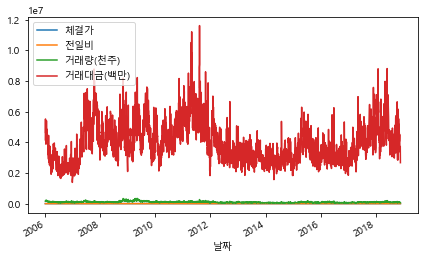

In [63]:
엑셀에_반영(xw.Range('C3'), df, '일일주식현황')

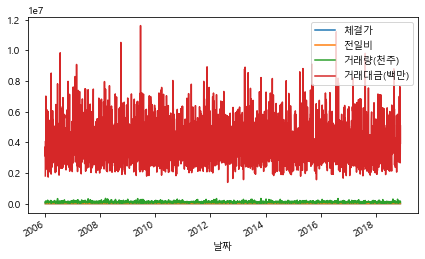

In [66]:
index = df.index
sample_df = df.sample(frac=1).reset_index(drop=True) # 임의로 데이터를 변경(?)
sample_df.index = index

엑셀에_반영(xw.Range('C3'), sample_df, '일일주식현황')